In [20]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

In [21]:
corona = pd.read_csv('data/WHO_COVID19.csv')

In [22]:
# 코로나 데이터의 Date 컬럼의 데이터 타입을 변경.
corona.Date_reported = pd.to_datetime(corona['Date_reported'], format='%Y-%m-%d')

In [23]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20430 entries, 0 to 20429
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Date_reported      20430 non-null  datetime64[ns, UTC]
 1   Country_code       20343 non-null  object             
 2   Country            20430 non-null  object             
 3   WHO_region         20305 non-null  object             
 4   New_cases          20430 non-null  int64              
 5   Cumulative_cases   20430 non-null  int64              
 6   New_deaths         20430 non-null  int64              
 7   Cumulative_deaths  20430 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 1.2+ MB


In [24]:
corona.shape

(20430, 8)

In [25]:
corona.loc[corona['Country'] == 'Afghanistan'].sum()['New_cases']

20342

In [26]:
len(corona.Country.unique())

216

In [27]:
corona_df = pd.DataFrame(
    data= {
        'Cases': [corona.loc[corona['Country'] == x].sum()['New_cases'] for x in corona.Country.unique()],
        'Deaths': [corona.loc[corona['Country'] == x].sum()['New_deaths'] for x in corona.Country.unique()]
    },

    index = corona.Country.unique(),
    columns = ['Cases', 'Deaths']
)

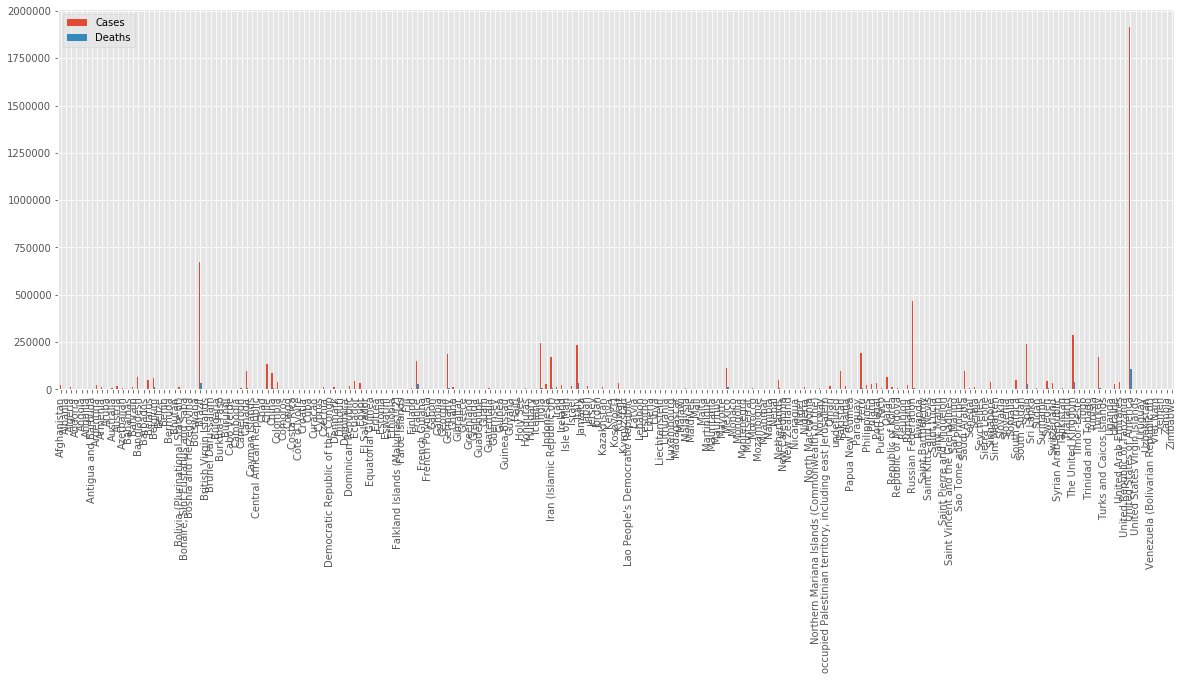

In [28]:
corona_df.plot(kind='bar', figsize=(20, 7))

In [29]:
# 데이터를 2, 3, 4, 5, 6월로 나눈다.
mask2 = (corona['Date_reported'] >= '2020-02-01') & (corona['Date_reported'] < '2020-03-01')
mask3 = (corona['Date_reported'] >= '2020-03-01') & (corona['Date_reported'] < '2020-04-01')
mask4 = (corona['Date_reported'] >= '2020-04-01') & (corona['Date_reported'] < '2020-05-01')
mask5 = (corona['Date_reported'] >= '2020-05-01') & (corona['Date_reported'] < '2020-06-01')
mask6 = (corona['Date_reported'] >= '2020-06-01')

In [30]:
corona2 = corona.loc[mask2]
corona3 = corona.loc[mask3]
corona4 = corona.loc[mask4]
corona5 = corona.loc[mask5]
corona6 = corona.loc[mask6]

In [31]:
# 각 월의 New_cases (확진자) New_deaths (사망자)의 합을 구한다.
corona2_data = corona2[['New_cases', 'New_deaths']].sum()
corona3_data = corona3[['New_cases', 'New_deaths']].sum()
corona4_data = corona4[['New_cases', 'New_deaths']].sum()
corona5_data = corona5[['New_cases', 'New_deaths']].sum()
corona6_data = corona6[['New_cases', 'New_deaths']].sum()

In [32]:
corona_data = pd.DataFrame(
    data = {
        'Cases': [corona2_data.New_cases, corona3_data.New_cases, corona4_data.New_cases, corona5_data.New_cases, corona6_data.New_cases],
        'Deaths': [corona2_data.New_deaths, corona3_data.New_deaths, corona4_data.New_deaths, corona5_data.New_deaths, corona6_data.New_deaths]
    },

    index = ['Feb', 'Mar', 'Apr', 'May', 'Jun'],
    columns = ['Cases', 'Deaths']
)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

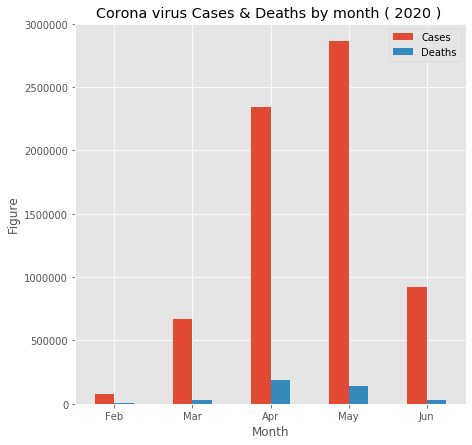

In [34]:
matplotlib.style.use('ggplot')
corona_data.plot(kind='bar', figsize=(7, 7))
plt.title('Corona virus Cases & Deaths by month ( 2020 ) ')
plt.xlabel('Month')
plt.ylabel('Figure')
plt.xticks(rotation=0, horizontalalignment='center')

In [36]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [57]:
corona_df = pd.DataFrame(
    data = {
        'Country': corona.Country.unique(),
        'Cases': [corona.loc[corona['Country'] == x].sum()['New_cases'] for x in corona.Country.unique()],
        'Deaths': [corona.loc[corona['Country'] == x].sum()['New_deaths'] for x in corona.Country.unique()]
    },
    columns = ['Country', 'Cases', 'Deaths']
)

In [48]:
countries = countries.drop(['pop_est', 'continent', 'iso_a3', 'gdp_md_est'], axis=1)

In [49]:
countries['Cases'] = 0
countries['Deaths'] = 0

In [130]:
for i in range(countries.shape[0]):
    if countries.loc[i, 'name'] in list(corona_df['Country']):
        country = countries['name'].loc[i]
        countries.loc[i, 'Cases'] = corona_df['Cases'].loc[corona_df['Country'] == country].to_numpy()[0]
        countries.loc[i, 'Deaths'] = corona_df['Deaths'].loc[corona_df['Country'] == country].to_numpy()[0]


Text(0.5, 1, 'COVID19 deaths dist Worldwide')

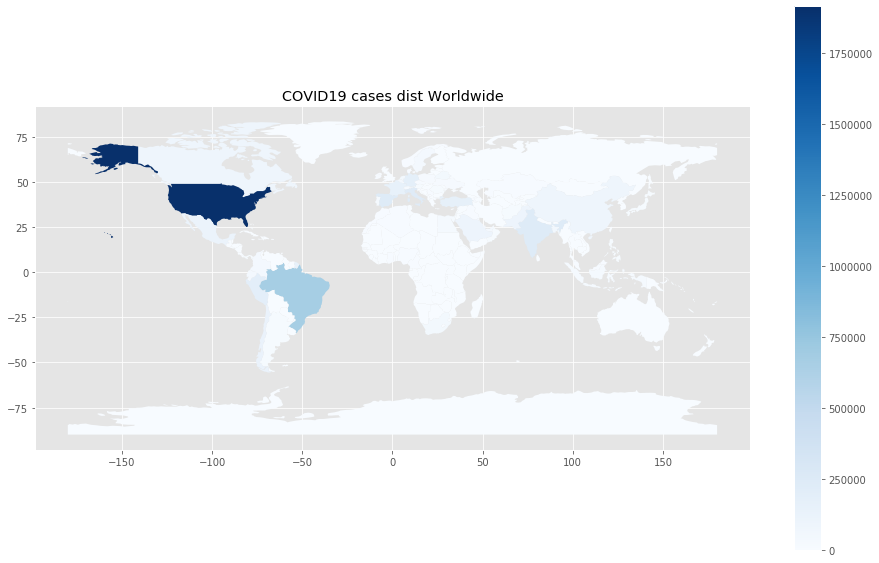

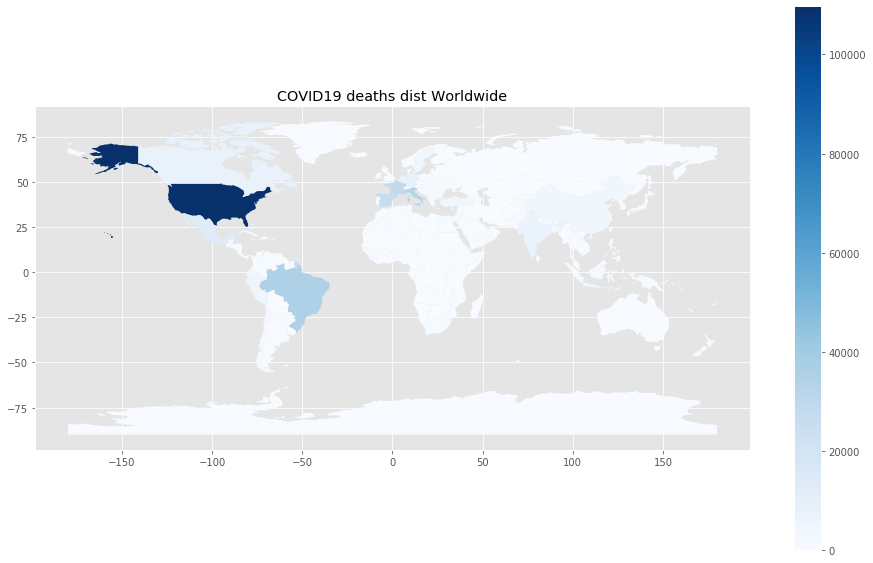

In [152]:
countries.plot(column='Cases', figsize=(16, 10), cmap='Blues', legend=True)
plt.title('COVID19 cases dist Worldwide')
countries.plot(column='Deaths', figsize=(16, 10), cmap='Blues', legend=True)
plt.title('COVID19 deaths dist Worldwide')